In [44]:
!pip install catboost

In [45]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
df = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [47]:
df.shape

(506, 13)

In [48]:
df.dtype

dtype('float64')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)


In [50]:
model = CatBoostRegressor(iterations=1000, depth=8, learning_rate=0.05, loss_function='RMSE',
                           random_seed=42, l2_leaf_reg=1)

In [51]:
model.fit(X_train, y_train, verbose=100, eval_set=(X_test, y_test), early_stopping_rounds=50)

0:	learn: 9.0020476	test: 8.4095123	best: 8.4095123 (0)	total: 13.6ms	remaining: 13.6s
100:	learn: 1.7496020	test: 3.2646698	best: 3.2646698 (100)	total: 601ms	remaining: 5.35s
200:	learn: 0.9726505	test: 3.0362205	best: 3.0362205 (200)	total: 1.44s	remaining: 5.74s
300:	learn: 0.5818381	test: 2.9857265	best: 2.9857265 (300)	total: 2.07s	remaining: 4.82s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 2.980601834
bestIteration = 314

Shrink model to first 315 iterations.


In [52]:
y_pred = model.predict(X_test)

In [53]:
y_pred

array([24.61951657, 29.79612399, 16.10995832, 23.90291017, 16.16479168,
       21.96620609, 19.41533747, 14.85955243, 21.19257177, 20.46921239,
       21.25112561, 19.42673204,  7.80799285, 21.73588536, 19.43968294,
       23.57411435, 19.75321019,  9.37650806, 43.76299704, 14.28887094,
       24.95484852, 25.1917329 , 13.33651447, 21.58680042, 14.40969043,
       16.09083103, 22.30573291, 13.90180886, 20.20803133, 20.63283845,
       20.95367068, 23.56590007, 21.37815241, 22.03890376, 15.11999286,
       16.49008812, 35.52581167, 18.52302   , 22.9998298 , 23.24337579,
       18.09930231, 29.42451049, 42.64947385, 19.48418839, 22.93099906,
       13.81754368, 14.22441547, 24.09969962, 19.20374409, 26.05365903,
       22.53293348, 36.45414434, 18.23660788, 24.90167829, 45.03091217,
       22.50490127, 14.2964888 , 32.60026588, 22.04437289, 18.49242439,
       23.55633875, 35.51997742, 29.5665242 , 18.17335086, 23.85466921,
       18.37995176, 13.73776741, 23.64060698, 28.58094162, 14.67

Text(0.5, 1.0, 'Regression Plot: True Values vs Predicted Values')

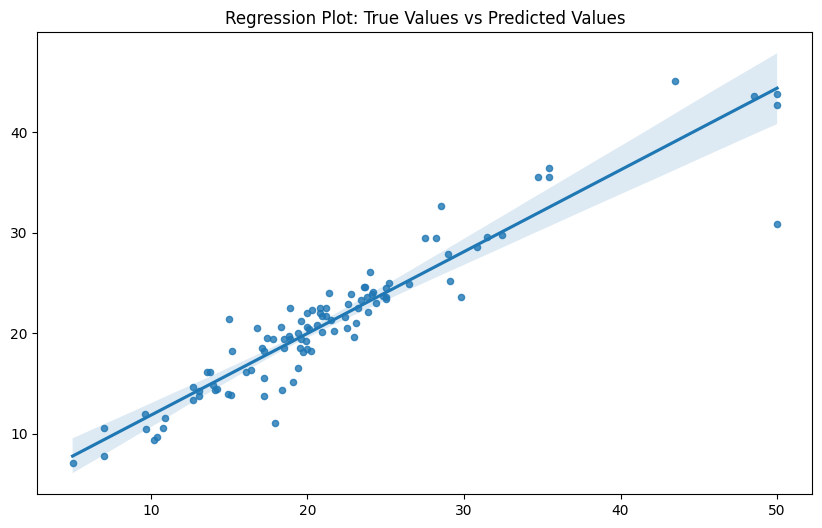

In [54]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20})
plt.title("Regression Plot: True Values vs Predicted Values")

In [55]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 8.883987158812726
